# APS1070
#### Linear Regression - Project 4

## Linear Regression - Assignment

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1]

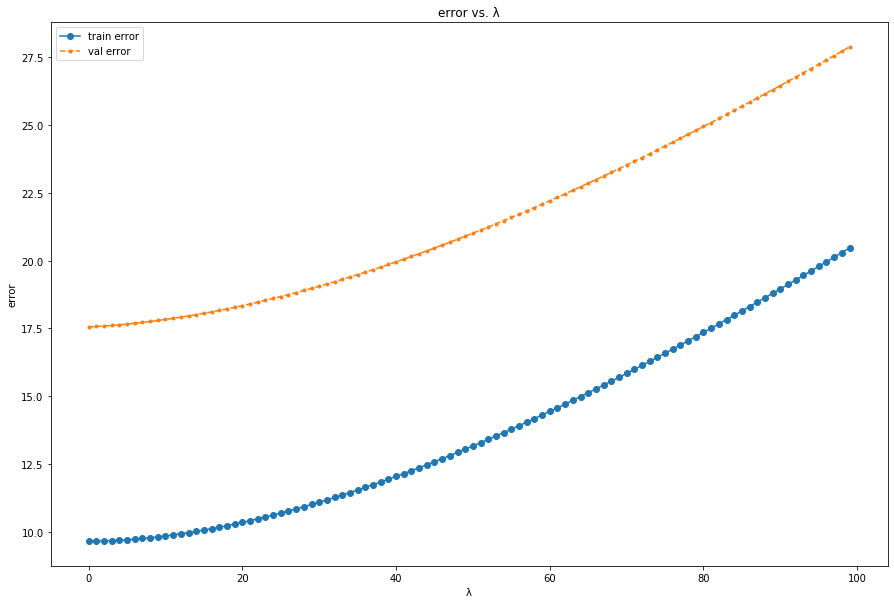

best λ is: 0 Lowest val error is: 17.558210389646668 Lowest train error is: 9.663235101792862


In [0]:

from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['MEDV'] = dataset.target

def sq_error(yPred, y, λ, w):
  m = y.shape[0]
  diff = yPred - y
  error = (0.5/m)*(np.sum(np.dot(diff.T, diff)))# + np.dot(λ,np.sum(np.dot(w.T, w))))
  return error

X = np.array(df.iloc[:,0:-1])
y = np.array(df.iloc[:,-1])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_val = np.hstack((np.ones((X_val.shape[0],1)),X_val))


f = 13 # number of features
error_train = []
error_val = []

for i in range(100):
  λ = i
  # analytical solution
  w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f+1)), np.dot(X_train.T, y_train))
  # prediction
  y_train_pred = np.dot(X_train, w)
  error_train.append(sq_error(y_train_pred, y_train, λ, w))
  y_val_pred = np.dot(X_val, w)
  error_val.append(sq_error(y_val_pred, y_val, λ, w))

fig = plt.figure(figsize=(15, 10))
plt.plot(range(100), error_train ,marker='o',linestyle = '-',label = "train error")
plt.plot(range(100), error_val, marker='.',linestyle = '--',label = "val error")
plt.title('error vs. λ')
plt.xlabel('λ')
plt.ylabel('error')
plt.legend()
plt.show()

print("best λ is:",error_val.index(min(error_val)),"Lowest val error is:", min(error_val), "Lowest train error is:",min(error_train))

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]
![alt text](https://i.imgur.com/iua8wmh.jpg)

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]

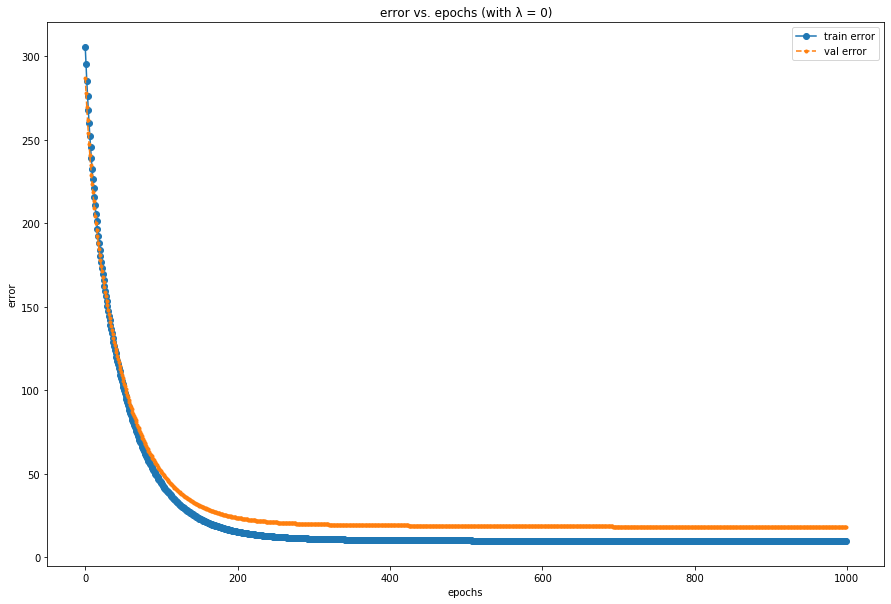

Lowest val error is: 18.171754484853906 Lowest train error is: 9.797198265887763 looks very close to the answer from Q1, after running 1000 epochs


In [0]:

# X_train, X_val, y_train, y_val
f = 13 # number of features
η = 0.01
m = X_train.shape[0]
λ = 0
epochs = 1000
error_train = []
error_val = []
# w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f+1)), np.dot(X_train.T, y_train))
w = np.ones((X_train.shape[1]))
for i in range(epochs):
  y_train_pred = np.dot(X_train, w)
  y_val_pred = np.dot(X_val, w)
  error_train.append(sq_error(y_train_pred, y_train, λ, w))
  error_val.append(sq_error(y_val_pred, y_val, λ, w))
  w_new = w - (η/m)*(np.dot(X_train.T, (y_train_pred-y_train))+(λ)*w)
  w = w_new

fig = plt.figure(figsize=(15, 10))
plt.plot(range(epochs), error_train ,marker='o',linestyle = '-',label = "train error")
plt.plot(range(epochs), error_val, marker='.',linestyle = '--',label = "val error")
plt.title('error vs. epochs (with λ = 0)')
plt.xlabel('epochs')
plt.ylabel('error')
plt.legend()
plt.show()

print("Lowest val error is:",min(error_val), "Lowest train error is:",min(error_train), "looks very close to the answer from Q1, after running 1000 epochs")

### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

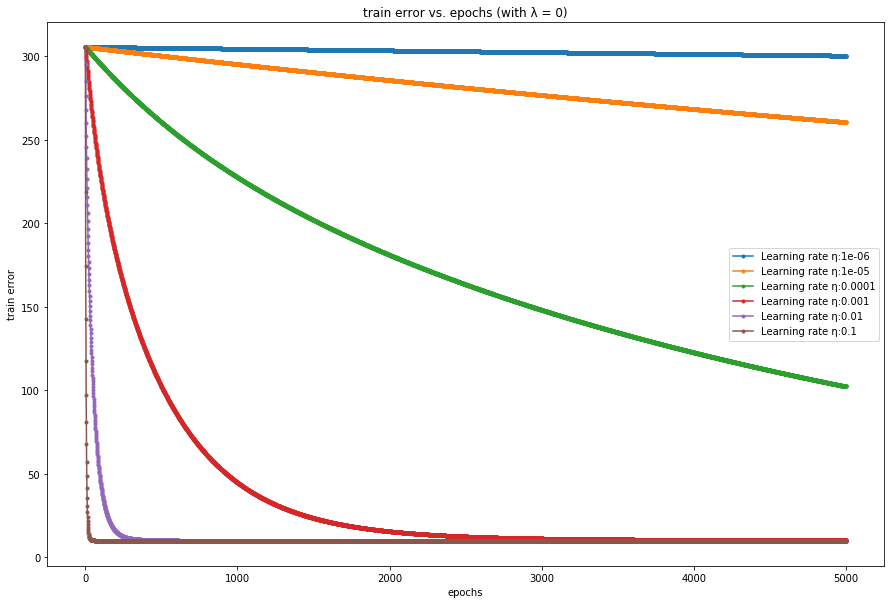

It seems that for low η, the converge is very slow; it still has high error even after 5000 epochs. For high η, the converge is faster, as they seems to reach lowest error before 5000 epochs.


In [0]:


f = 13 # number of features
η = 0.01
m = X_train.shape[0]
λ = 0
epochs = 5000
fig = plt.figure(figsize=(15, 10))
# w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f+1)), np.dot(X_train.T, y_train))

for η in [0.000001,0.00001,0.0001,0.001,0.01,0.1]:
  error_train = []
  w = np.ones((X_train.shape[1]))
  y_train_pred = np.dot(X_train, w)
  error_train.append(sq_error(y_train_pred, y_train, λ, w))
  for i in range(epochs):
    y_train_pred = np.dot(X_train, w)
    error_train.append(sq_error(y_train_pred, y_train, λ, w))
    w_new = w - (η/m)*(np.dot(X_train.T, (y_train_pred-y_train))+(λ)*w)
    w = w_new
  plt.plot(range(epochs+1), error_train ,marker='.',linestyle = '-',label = "Learning rate η:{0}".format(η))

plt.title('train error vs. epochs (with λ = 0)')
plt.xlabel('epochs')
plt.ylabel('train error')
plt.legend()
plt.show()

print("It seems that for low η, the converge is very slow; it still has high error even after 5000 epochs. For high η, the converge is faster, as they seems to reach lowest error before 5000 epochs.")

### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]

**Answer: B = 1 converges the fastest in terms of #updates, since the next fastest (B=16) stops before it converges. B = 1 also converges faster in terms of "wall-clock-time", since it converges before 0.02 seconds**

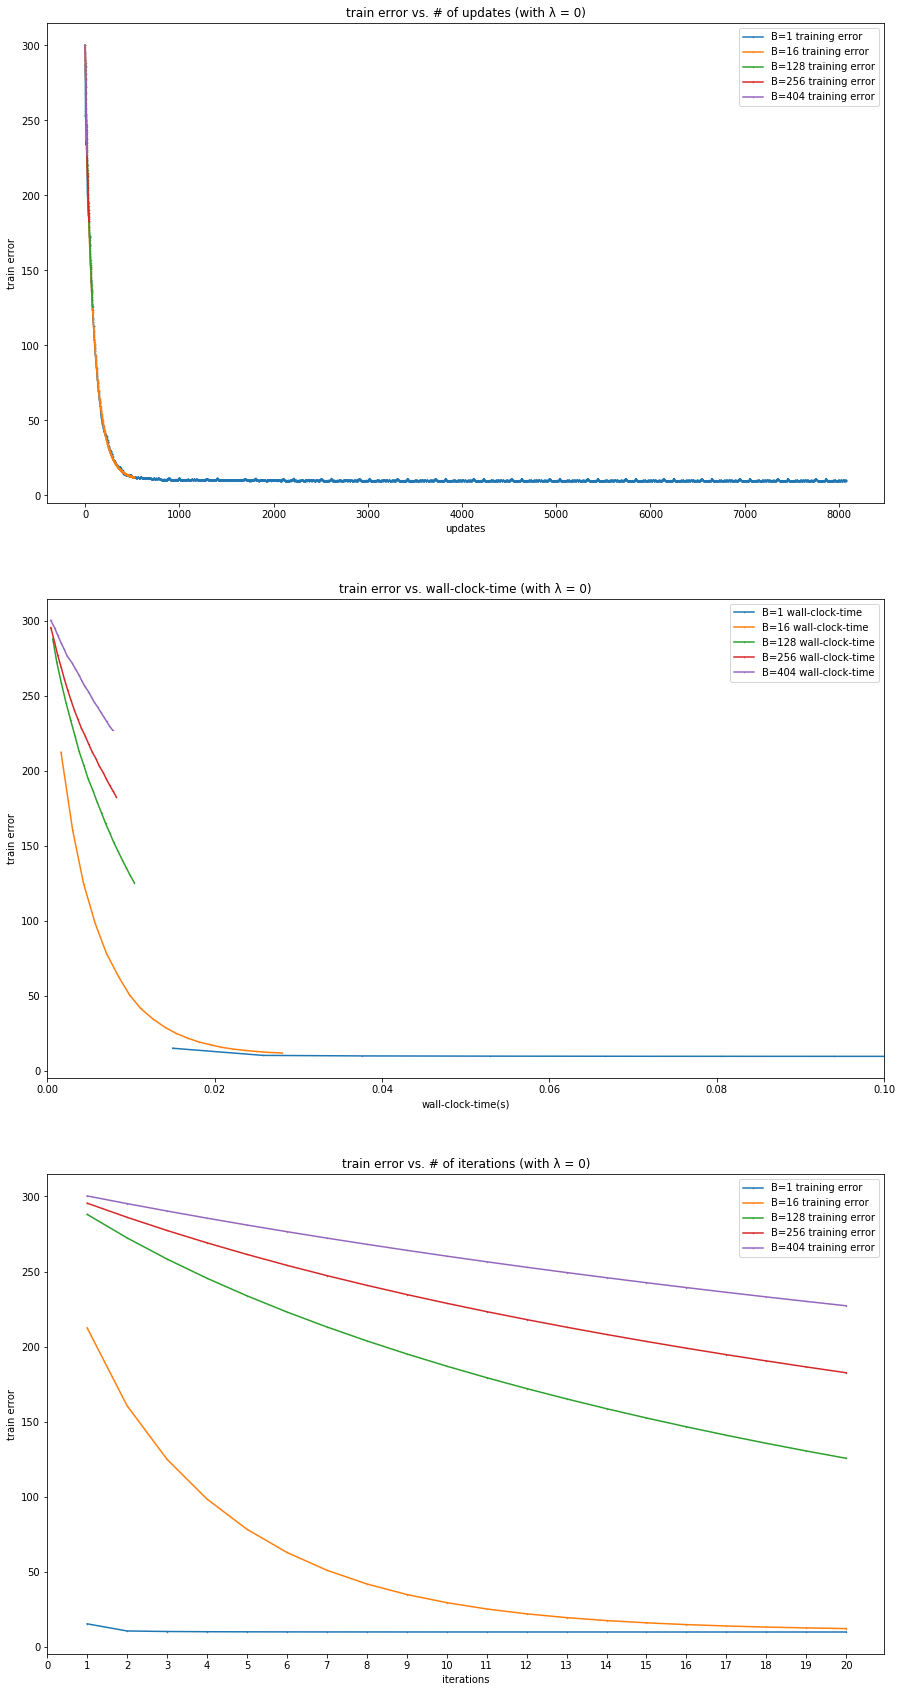

Lowest error at 10 iterations is: 9.909094606341174  At B = 1
Lowest error at 15 iterations is: 9.89395655774815  At B = 1
Lowest error at 20 iterations is: 9.88916766757887  At B = 1


In [0]:


def batchGradientDescent(X, y, w, lr=0.01, iterations=100, λ=0, bs=1):
  '''
  X, y: training data
  w: weights
  lr: learning rate
  iteration: number of epochs
  λ: regularization parameter
  bs: batch size
  '''
  import time
  start = time.time()
  η = lr
  # m is the number of data points
  m, n = X.shape
  # these are used to stored the cost and time
  costHistory = np.zeros(iterations)
  timeHistory = np.zeros(iterations)
  updateHistory = []

  for i in range(0,iterations):
    data = np.hstack((X, y.reshape(-1,1)))
    data = np.random.RandomState(seed=0).permutation(data)
    shuf_X = data[:, :-1] 
    shuf_y = data[:, -1]

    for j in range(0, m, bs):
      # mini_X = shuf_X[0:1+bs,:]
      # mini_y = shuf_y[0:1+bs]
      mini_X = shuf_X[j:j+bs,:]
      mini_y = shuf_y[j:j+bs]
      mini_y_pred = np.dot(mini_X, w)
      size = mini_X.shape[0]
      w = w - (0.5*η/size)*(np.dot(mini_X.T, (mini_y_pred - mini_y)) + np.dot(λ,w))
      update_error = sq_error(np.dot(X, w), y, λ, w)
      updateHistory.append(update_error)
    iteration_error = sq_error(np.dot(X, w), y, λ, w)
    costHistory[i] = iteration_error
    end = time.time()
    timeHistory[i] = (end - start)
  return w, costHistory, timeHistory, updateHistory

fig = plt.figure(figsize=(15, 30))

ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)

min_cost10 = {}
min_cost15 = {}
min_cost20 = {}

for b in [1, 16, 128, 256, X_train.shape[0]]:
  w = np.ones((X_train.shape[1]))
  iterations = 20
  new_w, costHistory, timeHistory, updateHistory = batchGradientDescent(X_train, y_train, w, lr=0.01, iterations = iterations, λ=0, bs=b)
  # leap = X_train.shape[0]//b
  ax1.plot(range(len(updateHistory)), updateHistory ,marker='.', markersize = 1,linestyle = '-',label = "B={0} training error".format(b))
  # ax1.set(xlim=(0, 600))
  ax2.plot(timeHistory, costHistory, marker='.',markersize = 1, linestyle = '-',label = "B={0} wall-clock-time".format(b))
  ax2.set(xlim=(0.0, 0.1))
  ax3.plot(range(1,iterations+1), costHistory ,marker='.',markersize = 1,linestyle = '-',label = "B={0} training error".format(b))
  min_cost10[b] = costHistory[9]
  min_cost15[b] = costHistory[14]
  min_cost20[b] = costHistory[19]
  if b == 1:
    best_w = new_w
ax1.set_title('train error vs. # of updates (with λ = 0)')
# ax1.set_xticks(np.arange(min(range(iterations+1)), max(range(iterations+1))+1, 1.0))
ax1.set_xlabel('updates')
ax1.set_ylabel('train error')

ax2.set_title('train error vs. wall-clock-time (with λ = 0)')
ax2.set_xlabel('wall-clock-time(s)')
ax2.set_ylabel('train error')

ax3.set_title('train error vs. # of iterations (with λ = 0)')
ax3.set_xticks(np.arange(min(range(iterations+1)), max(range(iterations+1))+1, 1.0))
ax3.set_xlabel('iterations')
ax3.set_ylabel('train error')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

best_B10 = min(min_cost10, key = min_cost10.get)
best_B15 = min(min_cost15, key = min_cost15.get)
best_B20 = min(min_cost20, key = min_cost20.get)

print("Lowest error at 10 iterations is:",min_cost10.get(best_B10)," At B =",best_B10)
print("Lowest error at 15 iterations is:",min_cost15.get(best_B15)," At B =",best_B15)
print("Lowest error at 20 iterations is:",min_cost20.get(best_B20)," At B =",best_B20)

### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]
![alt text](https://i.imgur.com/9HX7El3.jpg)

2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

**Answer:I found that for ABS Error, the best learning rate is 0.1, and best B is 1. Please see plots below for absolute error vs square error plots. It seems like Square Error is easier to train than ABS Error. As it not only converge faster, it also has less noise. The comparison plot also shows that the Square Error has a lower final error after 20 iterations.**




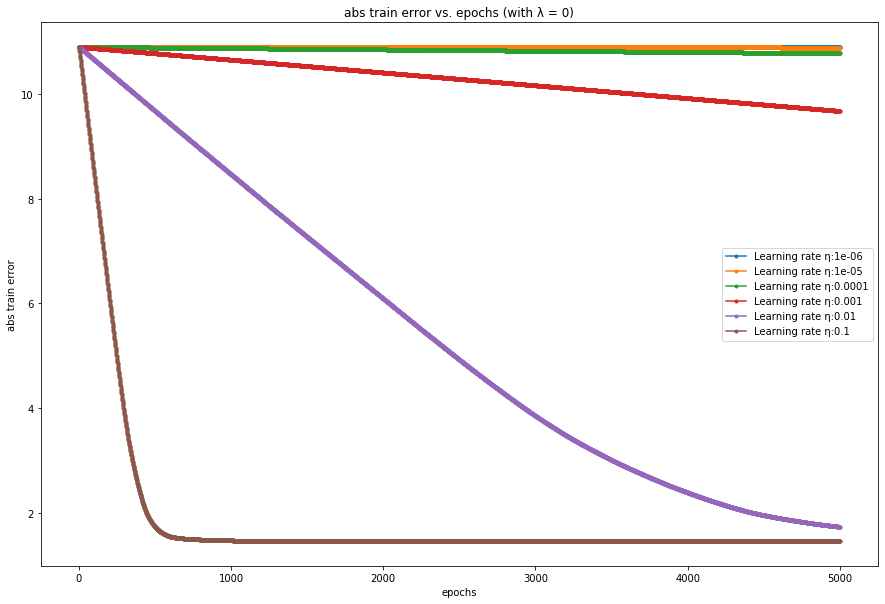

It seems that for absolute error, the learning rate of 0.1 or 0.01 is appropriate.


In [0]:


def abs_error(yPred, y, λ, w):
  m = y.shape[0]
  diff = yPred - y
  error = (0.5/m)*(np.sum(np.abs(diff)))#+λ*np.sum(np.dot(w.T, w)))
  return error

f = 13 # number of features
η = 0.01
m = X_train.shape[0]
λ = 0
epochs = 5000
fig = plt.figure(figsize=(15, 10))
# w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f+1)), np.dot(X_train.T, y_train))

for η in [0.000001,0.00001,0.0001,0.001,0.01,0.1]:
  error_train = []
  w = np.ones((X_train.shape[1]))
  y_train_pred = np.dot(X_train, w)
  error_train.append(abs_error(y_train_pred, y_train, λ, w))
  for i in range(epochs):
    y_train_pred = np.dot(X_train, w)
    error_train.append(abs_error(y_train_pred, y_train, λ, w))
    size = X_train.shape[0]
    abs_diff_ratio = np.ones(size)
    for k in range(size):
      if (y_train_pred[k] < y_train[k]):
        abs_diff_ratio[k] = -1
    w = w - (0.5*η/size)*(np.dot(X_train.T, abs_diff_ratio)+2*(λ)*w)
  plt.plot(range(epochs+1), error_train ,marker='.',linestyle = '-',label = "Learning rate η:{0}".format(η))

plt.title('abs train error vs. epochs (with λ = 0)')
plt.xlabel('epochs')
plt.ylabel('abs train error')
plt.legend()
plt.show()

print("It seems that for absolute error, the learning rate of 0.1 or 0.01 is appropriate.")


The following plots are for learning rate of 0.01:


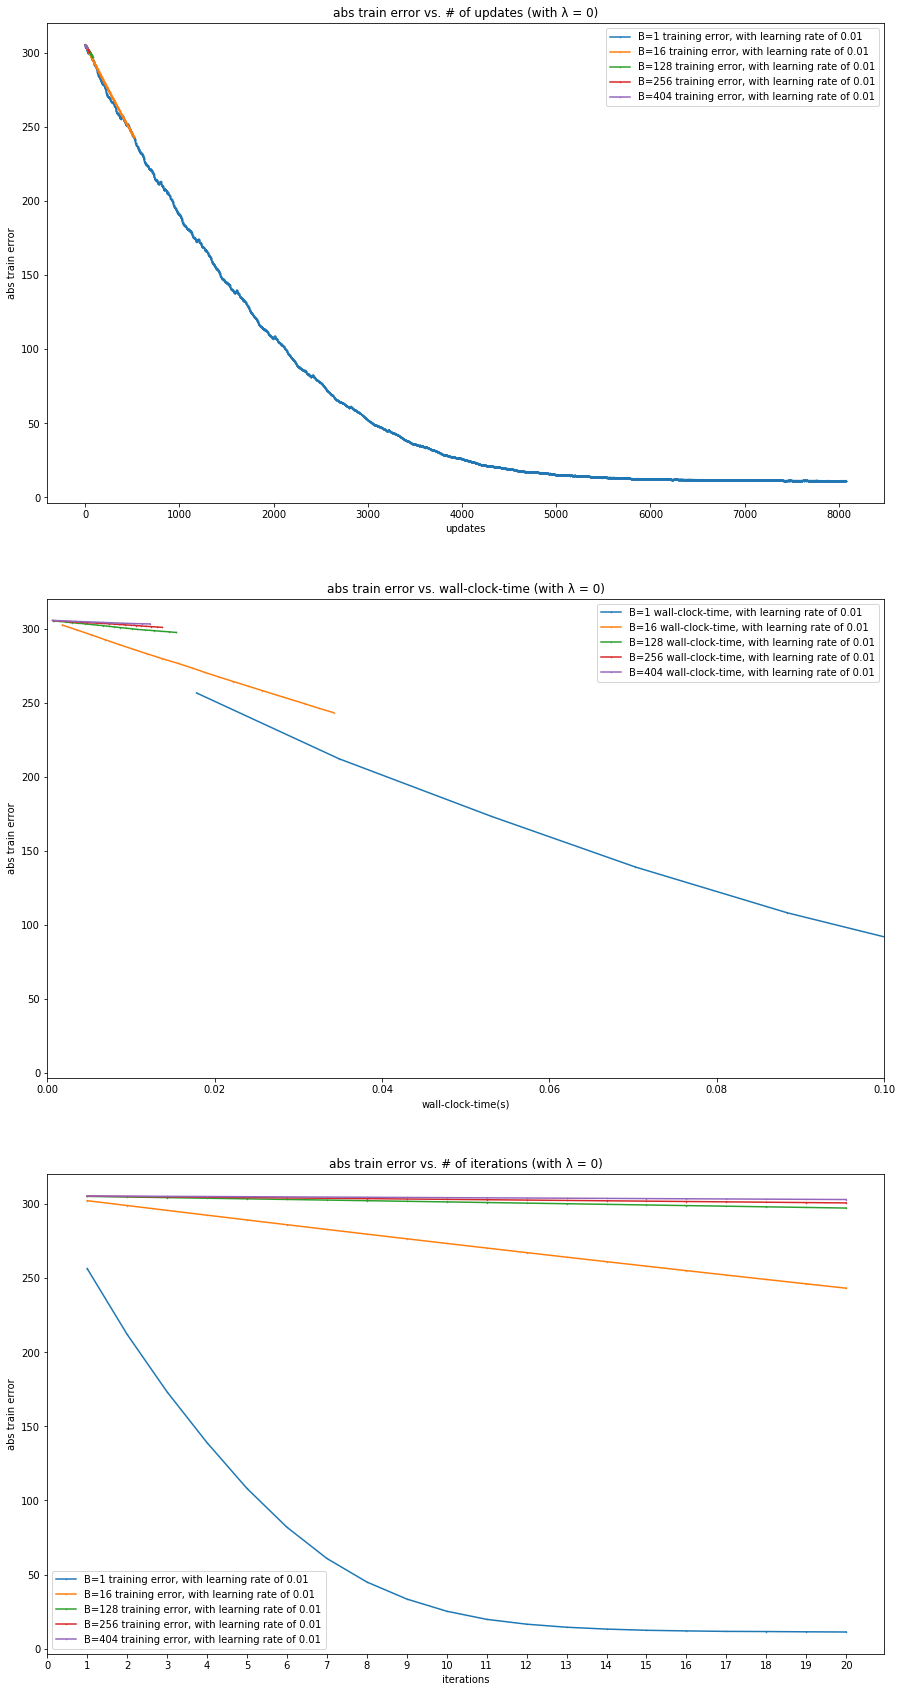

Lowest error at 10 iterations is: 25.27783511025499  At B = 1
Lowest error at 15 iterations is: 12.40999159750929  At B = 1
Lowest error at 20 iterations is: 11.25660490997122  At B = 1


The following plots are for learning rate of 0.1:


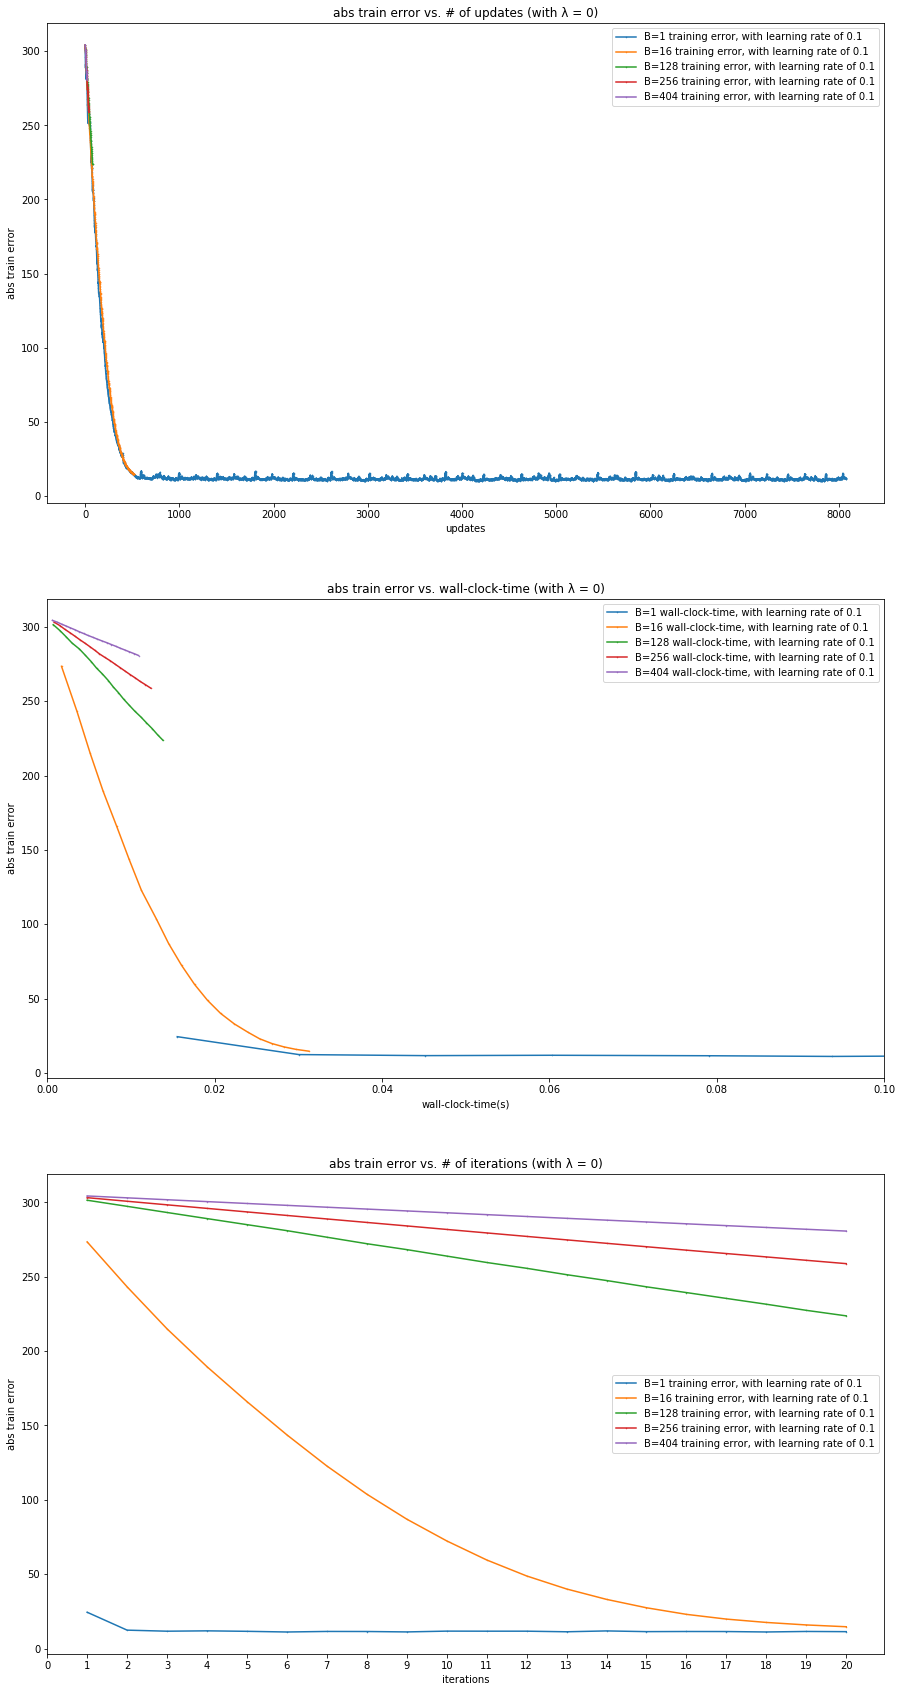

Lowest error at 10 iterations is: 11.707905732960441  At B = 1
Lowest error at 15 iterations is: 11.36999024019313  At B = 1
Lowest error at 20 iterations is: 11.347601644050846  At B = 1


Looks like learning rate of 0.1 shows a faster convergence, so I'm picking that as my best learning rate, also B=1 converges fastest, so I'm using that as my B


In [0]:


def new_batchGradientDescent(X, y, w, lr=0.01, iterations=100, λ=0, bs=1):
  '''
  X, y: training data
  w: weights
  lr: learning rate
  iteration: number of epochs
  λ: regularization parameter
  bs: batch size
  '''
  import time
  start = time.time()
  η = lr
  # m is the number of data points
  m, n = X.shape
  # these are used to stored the cost and time
  costHistory = np.zeros(iterations)
  timeHistory = np.zeros(iterations)
  updateHistory = []
  for i in range(0,iterations):
    data = np.hstack((X, y.reshape(-1,1)))
    data = np.random.RandomState(seed=0).permutation(data)
    shuf_X = data[:, :-1] 
    shuf_y = data[:, -1]

    for j in range(0, m, bs):
      # mini_X = shuf_X[0:1+bs,:]
      # mini_y = shuf_y[0:1+bs]
      mini_X = shuf_X[j:j+bs,:]
      mini_y = shuf_y[j:j+bs]
      mini_y_pred = np.dot(mini_X, w)
      size = mini_X.shape[0]
      abs_diff_ratio = np.ones(size)
      for k in range(size):
        if (mini_y_pred[k] < mini_y[k]):
          abs_diff_ratio[k] = -1
      
      w = w - (0.5*η/size)*(np.dot(mini_X.T, abs_diff_ratio)+2*(λ)*w)
      update_error = sq_error(np.dot(X, w), y, λ, w)
      updateHistory.append(update_error)
    iteration_error = sq_error(np.dot(X, w), y, λ, w)
    costHistory[i] = iteration_error
    end = time.time()
    timeHistory[i] = (end - start)
  return w, costHistory, timeHistory, updateHistory



for lr in [0.01, 0.1]:
  print("The following plots are for learning rate of {0}:".format(lr))
  fig = plt.figure(figsize=(15, 30))

  ax1 = plt.subplot(3,1,1)
  ax2 = plt.subplot(3,1,2)
  ax3 = plt.subplot(3,1,3)

  min_cost10 = {}
  min_cost15 = {}
  min_cost20 = {}

  for b in [1, 16, 128, 256, X_train.shape[0]]:
    w = np.ones((X_train.shape[1]))
    iterations = 20
    new_w, costHistory, timeHistory, updateHistory = new_batchGradientDescent(X_train, y_train, w, lr, iterations = iterations, λ=0, bs=b)
    # leap = X_train.shape[0]//b
    ax1.plot(range(len(updateHistory)), updateHistory ,marker='.', markersize = 1,linestyle = '-',label = "B={0} training error, with learning rate of {1}".format(b,lr))
    # ax1.set(xlim=(0, 600))
    ax2.plot(timeHistory, costHistory, marker='.',markersize = 1, linestyle = '-',label = "B={0} wall-clock-time, with learning rate of {1}".format(b,lr))
    ax2.set(xlim=(0.0, 0.1))
    ax3.plot(range(1,iterations+1), costHistory ,marker='.',markersize = 1,linestyle = '-',label = "B={0} training error, with learning rate of {1}".format(b,lr))
    min_cost10[b] = costHistory[9]
    min_cost15[b] = costHistory[14]
    min_cost20[b] = costHistory[19]
  ax1.set_title('abs train error vs. # of updates (with λ = 0)')
  # ax1.set_xticks(np.arange(min(range(iterations+1)), max(range(iterations+1))+1, 1.0))
  ax1.set_xlabel('updates')
  ax1.set_ylabel('abs train error')

  ax2.set_title('abs train error vs. wall-clock-time (with λ = 0)')
  ax2.set_xlabel('wall-clock-time(s)')
  ax2.set_ylabel('abs train error')

  ax3.set_title('abs train error vs. # of iterations (with λ = 0)')
  ax3.set_xticks(np.arange(min(range(iterations+1)), max(range(iterations+1))+1, 1.0))
  ax3.set_xlabel('iterations')
  ax3.set_ylabel('abs train error')

  ax1.legend()
  ax2.legend()
  ax3.legend()

  plt.show()

  best_B10 = min(min_cost10, key = min_cost10.get)
  best_B15 = min(min_cost15, key = min_cost15.get)
  best_B20 = min(min_cost20, key = min_cost20.get)

  print("Lowest error at 10 iterations is:",min_cost10.get(best_B10)," At B =",best_B10)
  print("Lowest error at 15 iterations is:",min_cost15.get(best_B15)," At B =",best_B15)
  print("Lowest error at 20 iterations is:",min_cost20.get(best_B20)," At B =",best_B20)
  print("\n")

print("Looks like learning rate of 0.1 shows a faster convergence, so I'm picking that as my best learning rate, also B=1 converges fastest, so I'm using that as my B")

Now using learning rate of 0.1 and B=1 for Absolute Error, I'm comparing performance between Square Error (learning rate of 0.01 and B = 1) and ABS Error (learning rate of 0.1 and B = 1), and see which one is better: 



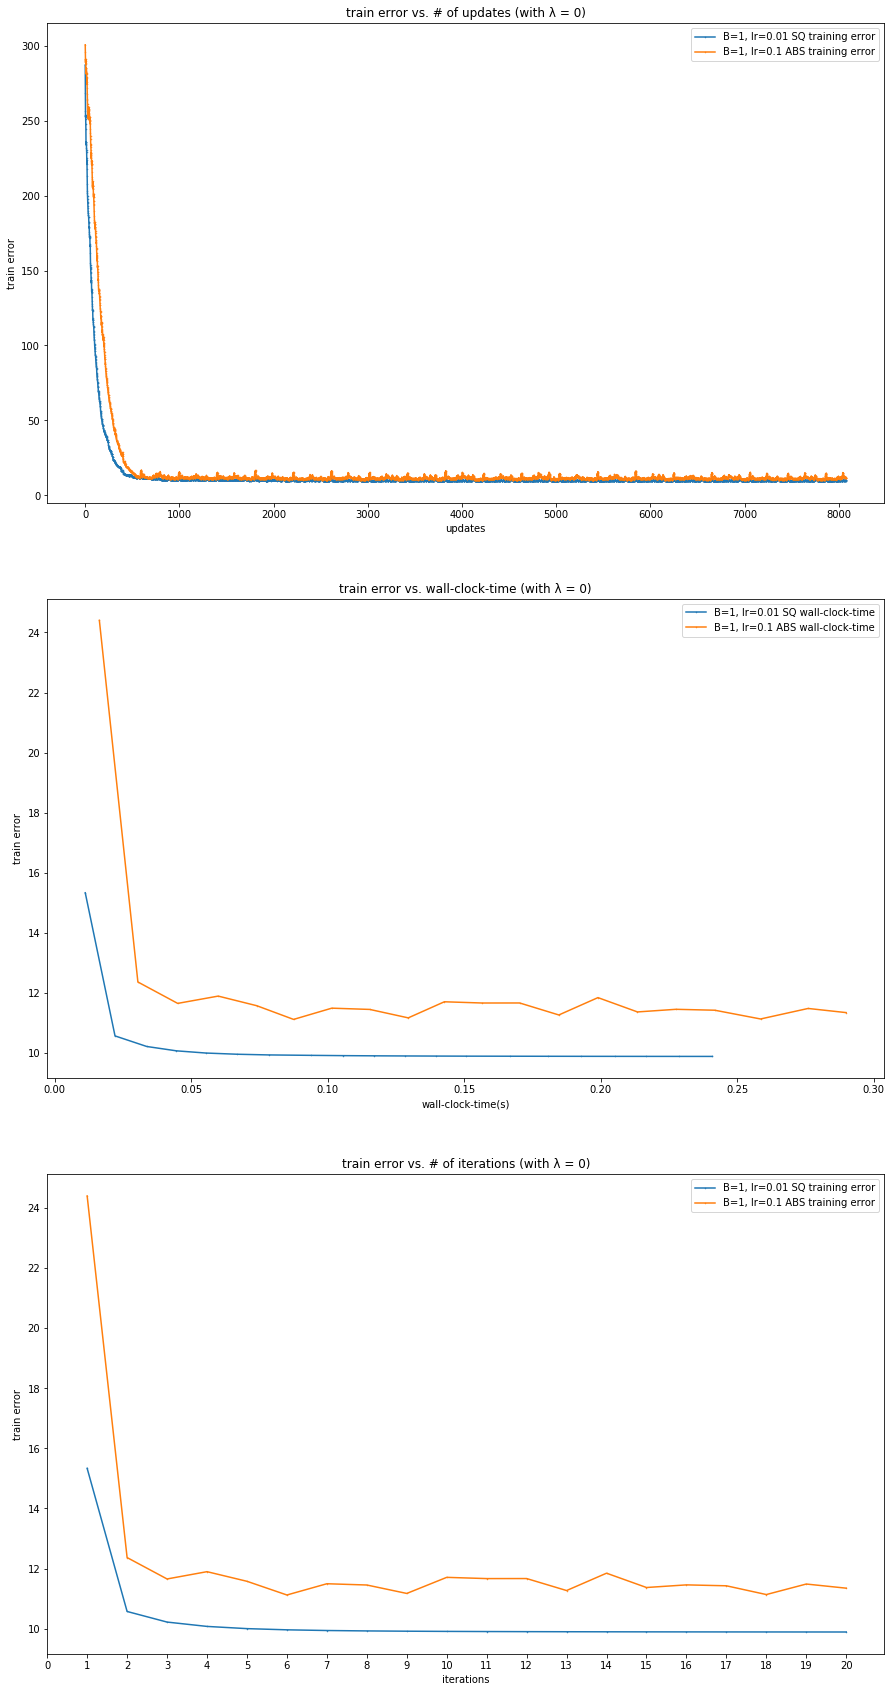

at the end, it seems like Square Error is easier to train with, as it is less noisy and converges faster!
The min error for ABS Error Method is:11.120957785125738, and the min error for Square Error Method is:9.88916766757887


In [0]:


print("Now using learning rate of 0.1 and B=1 for Absolute Error, I'm comparing performance between Square Error (learning rate of 0.01 and B = 1) and ABS Error (learning rate of 0.1 and B = 1), and see which one is better: \n")

fig = plt.figure(figsize=(15, 30))

ax1 = plt.subplot(3,1,1)
ax2 = plt.subplot(3,1,2)
ax3 = plt.subplot(3,1,3)


b = 1
w = np.ones((X_train.shape[1]))
iterations = 20

lr = 0.01
new_w, costHistory, timeHistory, updateHistory = batchGradientDescent(X_train, y_train, w, lr, iterations = iterations, λ=0, bs=b)
ax1.plot(range(len(updateHistory)), updateHistory ,marker='.', markersize = 1,linestyle = '-',label = "B={0}, lr={1} {2} training error".format(b,lr,"SQ"))
ax2.plot(timeHistory, costHistory, marker='.',markersize = 1, linestyle = '-',label = "B={0}, lr={1} {2} wall-clock-time".format(b,lr,"SQ"))
ax3.plot(range(1,iterations+1), costHistory ,marker='.',markersize = 1,linestyle = '-',label = "B={0}, lr={1} {2} training error".format(b,lr,"SQ"))

min_sq = min(costHistory)

lr = 0.1
new_w, costHistory, timeHistory, updateHistory = new_batchGradientDescent(X_train, y_train, w, lr, iterations = iterations, λ=0, bs=b)
ax1.plot(range(len(updateHistory)), updateHistory ,marker='.', markersize = 1,linestyle = '-',label = "B={0}, lr={1} {2} training error".format(b,lr,"ABS"))
ax2.plot(timeHistory, costHistory, marker='.',markersize = 1, linestyle = '-',label = "B={0}, lr={1} {2} wall-clock-time".format(b,lr,"ABS"))
ax3.plot(range(1,iterations+1), costHistory ,marker='.',markersize = 1,linestyle = '-',label = "B={0}, lr={1} {2} training error".format(b,lr,"ABS"))

min_abs = min(costHistory)

ax1.set_title('train error vs. # of updates (with λ = 0)')
ax1.set_xlabel('updates')
ax1.set_ylabel('train error')

ax2.set_title('train error vs. wall-clock-time (with λ = 0)')
ax2.set_xlabel('wall-clock-time(s)')
ax2.set_ylabel('train error')

ax3.set_title('train error vs. # of iterations (with λ = 0)')
ax3.set_xticks(np.arange(min(range(iterations+1)), max(range(iterations+1))+1, 1.0))
ax3.set_xlabel('iterations')
ax3.set_ylabel('train error')

ax1.legend()
ax2.legend()
ax3.legend()

plt.show()

print("at the end, it seems like Square Error is easier to train with, as it is less noisy and converges faster!")
print("The min error for ABS Error Method is:{0}, and the min error for Square Error Method is:{1}".format(min_abs, min_sq))

### Question 7 (Optional)


1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.


 Original(without poly-features):


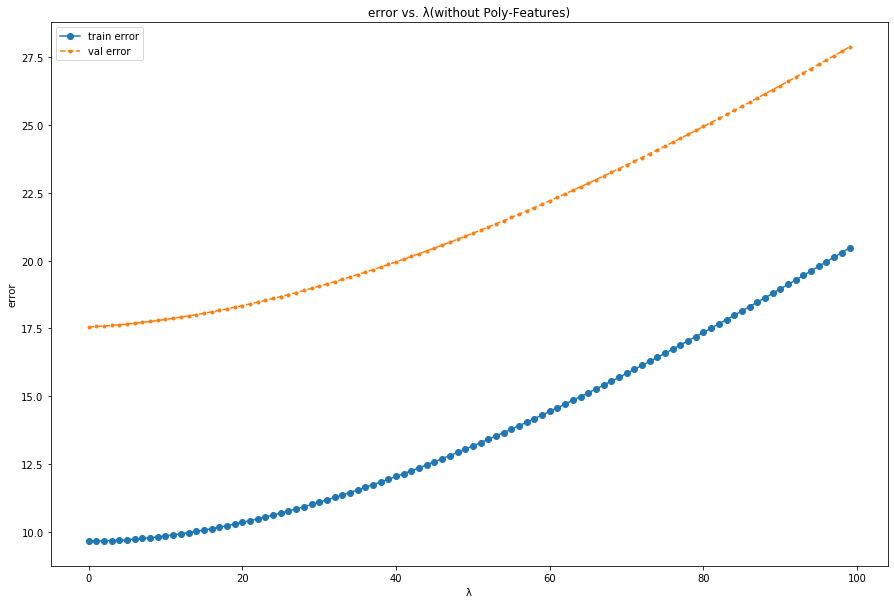

Original (without poly-features): best λ is: 0 Lowest val error is: 17.558210389646668 Lowest train error is: 9.663235101792862

 New (with poly-features):


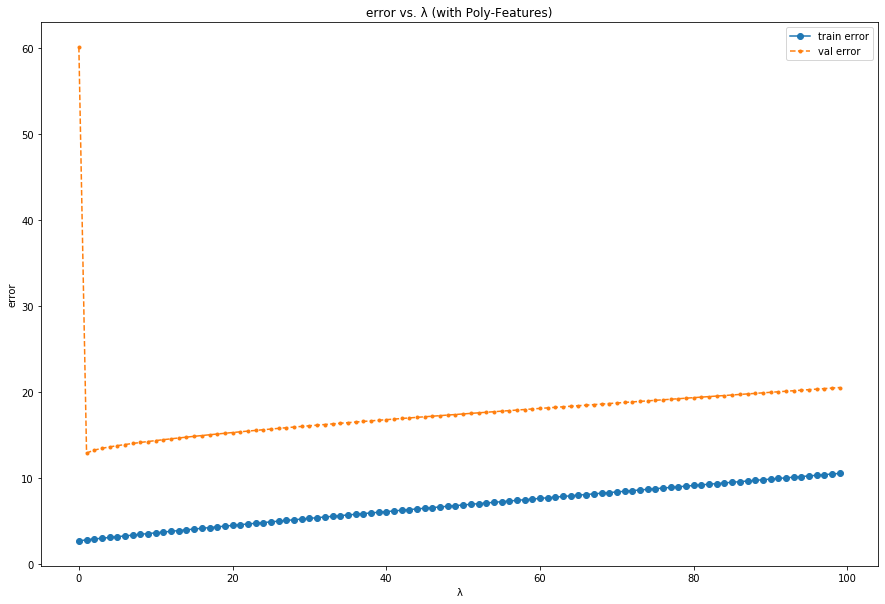

New (without poly-features): best λ is: 1 Lowest val error is: 12.910138675998905 Lowest train error is: 2.6647432126327217
It seems that polynomial features does help the model achieve better results. The best λ now for validation error is 1, instead of 0. Also, both train and validation error at λ = 1 has been reduced, suggesting that the model will fit better.


In [0]:


from sklearn.preprocessing import PolynomialFeatures

X = np.array(df.iloc[:,0:-1])
y = np.array(df.iloc[:,-1])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

poly_X_train = X_train.copy()
poly_X_val = X_val.copy()

X_train = np.hstack((np.ones((X_train.shape[0],1)),X_train))
X_val = np.hstack((np.ones((X_val.shape[0],1)),X_val))

# poly = PolynomialFeatures(degree = 3)
poly = PolynomialFeatures(degree = 2, interaction_only=True)
poly_X_train = poly.fit_transform(poly_X_train)
poly_X_val = poly.fit_transform(poly_X_val)


print("\n Original(without poly-features):")

f = 13 # number of features
error_train = []
error_val = []

for i in range(100):
  λ = i
  # analytical solution
  w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f+1)), np.dot(X_train.T, y_train))
  # prediction
  y_train_pred = np.dot(X_train, w)
  error_train.append(sq_error(y_train_pred, y_train, λ, w))
  y_val_pred = np.dot(X_val, w)
  error_val.append(sq_error(y_val_pred, y_val, λ, w))

fig = plt.figure(figsize=(15, 10))
plt.plot(range(100), error_train ,marker='o',linestyle = '-',label = "train error")
plt.plot(range(100), error_val, marker='.',linestyle = '--',label = "val error")
plt.title('error vs. λ(without Poly-Features)')
plt.xlabel('λ')
plt.ylabel('error')
plt.legend()
plt.show()

print("Original (without poly-features): best λ is:",error_val.index(min(error_val)),"Lowest val error is:", min(error_val), "Lowest train error is:",min(error_train))

print("\n New (with poly-features):")
f = poly_X_train.shape[1] # number of features
error_train = []
error_val = []

for i in range(100):
  λ = i
  # analytical solution
  w = np.dot(np.linalg.inv(np.dot(poly_X_train.T, poly_X_train) + (λ)*np.identity(f)), np.dot(poly_X_train.T, y_train))
  # prediction
  y_train_pred = np.dot(poly_X_train, w)
  error_train.append(sq_error(y_train_pred, y_train, λ, w))
  y_val_pred = np.dot(poly_X_val, w)
  error_val.append(sq_error(y_val_pred, y_val, λ, w))

fig = plt.figure(figsize=(15, 10))
plt.plot(range(100), error_train ,marker='o',linestyle = '-',label = "train error")
plt.plot(range(100), error_val, marker='.',linestyle = '--',label = "val error")
plt.title('error vs. λ (with Poly-Features)')
plt.xlabel('λ')
plt.ylabel('error')
plt.legend()
plt.show()

print("New (without poly-features): best λ is:",error_val.index(min(error_val)),"Lowest val error is:", min(error_val), "Lowest train error is:",min(error_train))


print("It seems that polynomial features does help the model achieve better results. The best λ now for validation error is 1, instead of 0. Also, both train and validation error at λ = 1 has been reduced, suggesting that the model will fit better.")

### Calculate Validation SMAPE

validation SMAPE value is: 19.820603070991044


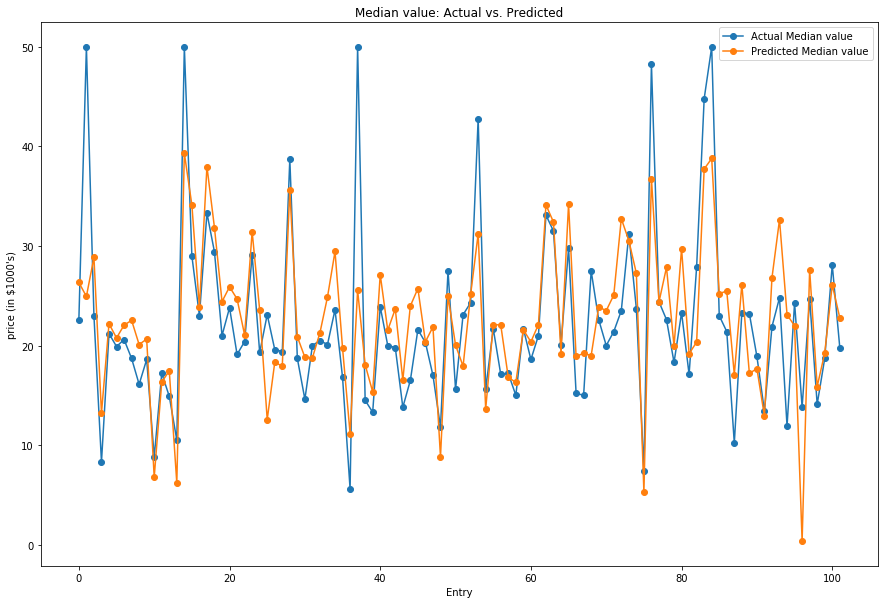

In [0]:
def smape(A, F):
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

w = best_w
y_val_pred = np.dot(X_val, w)
print("validation SMAPE value is:",smape(y_val, y_val_pred))
fig = plt.figure(figsize=(15, 10))
plt.plot(range(y_val.shape[0]), y_val ,marker='o',linestyle = '-', label = "Actual Median value")
plt.plot(range(y_val_pred.shape[0]), y_val_pred, marker='o',linestyle = '-', label = "Predicted Median value")
plt.title('Median value: Actual vs. Predicted')
plt.xlabel('Entry')
plt.ylabel('price (in $1000\'s)')
plt.legend()
plt.show()
